## 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import plotly.express as px

In [2]:
games_sales = pd.read_csv('/datasets/games.csv')
games_sales.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [3]:
games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_sales['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [5]:
games_sales['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
games_sales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Результаты ознакомления с данными:
- Данные таблицы представлены и в нижнем и верхнем регистре. Изменим ниже в предобработке.
- Наличие пропусков в шести столбцах
- Некорректный тип данных в столбце year_of_release (надо изменить на целочисленный тип, чтобы избавиться от знаков после запятой), user_score (необходимо изменить на float), critic_score(должен быть целочисленный)
- В столбце User_Score присутствует вместо рейтина абревиатура "tbd". Переводиться как "to be determined". Обычно используется в случаях, когда ожидается заполнение данного поля. В нашем случае рейтинг от пользователей не получен, но ожидается...В разделе предобработки подумаем, что сделать с этим значением

## 2. Предобработка данных

### 2.1. Приведем все данные таблицы к нижнему регистру

In [7]:
#Сначала данные столбцов
games_sales['Name'] = games_sales['Name'].str.lower()
games_sales['Platform'] = games_sales['Platform'].str.lower()
games_sales['Genre'] = games_sales['Genre'].str.lower()

In [8]:
#Затем названия столбцов
games_sales = games_sales.rename(columns={'Name':'name',
                                         'Platform':'platform',
                                         'Year_of_Release':'year_of_release',
                                         'Genre':'genre',
                                         'NA_sales':'na_sales',
                                         'EU_sales':'eu_sales',
                                         'JP_sales':'jp_sales',
                                         'Other_sales':'other_sales',
                                         'Critic_Score':'critic_score',
                                         'User_Score':'user_score',
                                         'Rating':'rating'
                                         })

In [9]:
games_sales.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii           2006.0        sports     41.36   
1         super mario bros.      nes           1985.0      platform     29.08   
2            mario kart wii      wii           2008.0        racing     15.68   
3         wii sports resort      wii           2009.0        sports     15.61   
4  pokemon red/pokemon blue       gb           1996.0  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

### 2.2. Добавим новый столбец с суммарными продажами по всем регионам

In [10]:
games_sales['total_sales'] = games_sales['na_sales'] + games_sales['eu_sales']+games_sales['jp_sales']+games_sales['other_sales']

In [11]:
games_sales.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii           2006.0        sports     41.36   
1         super mario bros.      nes           1985.0      platform     29.08   
2            mario kart wii      wii           2008.0        racing     15.68   
3         wii sports resort      wii           2009.0        sports     15.61   
4  pokemon red/pokemon blue       gb           1996.0  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  \
0     28.96      3.77         8.45          76.0          8      E   
1      3.58      6.81         0.77           NaN        NaN    NaN   
2     12.76      3.79         3.29          82.0        8.3      E   
3     10.93      3.28         2.95          80.0          8      E   
4      8.89     10.22         1.00           NaN        NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

### 2.3. Обработаем пропуски

In [12]:
#По 2 пропуска в столбцах Name и Genre, видимо, взаимозависимы. Посмотрим на них
games_sales.query('name.isnull()')

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      gen           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  total_sales  
659           0.08           NaN        NaN    NaN         2.39  
14244         0.00           NaN        NaN    NaN         0.03

In [13]:
#Это некая архаичная игра, смело удаляем эти пропуски
games_sales.dropna(subset=['name'], inplace=True)


In [14]:
len(games_sales.query('name.isnull()'))

0

In [15]:
#Пропуски в столбце year_of_release. Посчитаем их количество.
len(games_sales.query('year_of_release.isnull()'))

269

Эти пропуски пока не трогаем, возможно они удалятся когда мы будем оптимизировать выборку.
Если строки с этими пропусками попадут в исследуемую актуальную выборку, мы заполним их, например, 
зная платформу и период ее жизни либо по году из названия или какому-то другому принципу, если в этом будет необходимость.

Пропусков в столбцах оценки критиков, пользователей, рейтинга много. Удалять эти строки мы не будем, чтобы не обеднять данными нашу выборку. Заполнять тоже не будем. В дальнейшем при анализе, если потребуется использовать эти данные, будем обращаться лишь к тем строкам, где эти данные присутствуют.

### 2.4. Изменим типы данных

Тип данных в столбце с годом выпуска игры переводить в целочисленный пока не получится, поскольку у нас есть пропуски. Поскольку мы решили пока пропуски не трогать, то и тип данных оставим пока как есть и вернемся к вопросу, когда сформируем выборку для анализа.


Менять тип данных на целочисленный в столбце critic_score мы не будем, поскольку там есть пропуски, 
с которыми мы решили ничего не делать

Займемся столбцом user_score. Мы уже упоминали, что  столбце User_Score присутствует вместо рейтина абревиатура "tbd". Переводиться как "to be determined". Обычно используется в случаях, когда ожидается заполнение данного поля. В нашем случае рейтинг от пользователей не получен, но ожидается. Сделаем срез по этому значению и посмотрим, есть ли какие особенности.

In [16]:
len(games_sales.query('user_score == "tbd"'))

2424

In [17]:
games_sales.query('user_score == "tbd"').head(10)

name platform  year_of_release  \
119                              zumba fitness      wii           2010.0   
301             namco museum: 50th anniversary      ps2           2005.0   
520                            zumba fitness 2      wii           2011.0   
645                               udraw studio      wii           2010.0   
657   frogger's adventures: temple of the frog      gba              NaN   
718                            just dance kids      wii           2010.0   
726                  dance dance revolution x2      ps2           2009.0   
821                            the incredibles      gba           2004.0   
881              who wants to be a millionaire       pc           1999.0   
1047                             tetris worlds      gba           2001.0   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119       sports      3.45      2.59      0.00         0.66           NaN   
301         misc      2.08      1.35      0.00         0.54          61.0   
520       sports      1.51      1.03      0.00         0.27           NaN   
645         misc      1.65      0.57      0.00         0.20          71.0   
657    adventure      2.15      0.18      0.00         0.07          73.0   
718         misc      1.52      0.54      0.00         0.18           NaN   
726   simulation      1.09      0.85      0.00         0.28           NaN   
821       action      1.15      0.77      0.04         0.10          55.0   
881         misc      1.94      0.00      0.00         0.00           NaN   
1047      puzzle      1.25      0.39      0.00         0.06          65.0   

     user_score rating  total_sales  
119         tbd      E         6.70  
301         tbd   E10+         3.97  
520         tbd      T         2.81  
645         tbd      E         2.42  
657         tbd      E         2.40  
718         tbd      E         2.24  
726         tbd   E10+         2.22  
821         tbd      E         2.06  
881         tbd      E         1.94  
1047        tbd      E         1.70

Аббревиатура tbd используется применительно к совершенно разным играм, разных лет выпуска. Наши данные взяты из открытых источников. Предположим, что на момент обзора игры рейтинг пользователь еще отсутствовал и автор сделал соответствующую пометку, а потом информацию не обновил. Придумывать за пользователей рейтинг задним числом на основе неких усредненных данных мы не будем, а просто поменяем на NaN, чтобы аббревиатура не мешала в дальнейших расчетах

In [18]:
games_sales.loc[games_sales['user_score'] == 'tbd', 'user_score'] = 'NaN'

In [19]:
len(games_sales.query('user_score == "tbd"'))

0

In [20]:
games_sales['user_score'] = games_sales['user_score'].astype('float')

In [21]:
#Теперь посмотрим на типы данных еще раз
games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16713 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [22]:
#Посмотрим, есть ли дубликаты
games_sales.duplicated().sum()

0

In [23]:
#Дубликатов нет, двигаемся дальше

## 3. Исследовательский анализ данных

### 3.1. Актуальный период исследования

Цель нашей работы - помочь маркетологам расставить акценты в стратегии дальнейших продаж компьютерных игр. Значит в исследуемую основную выборку нужно включить данные по платформам, у которых есть будущее. Плюс в поиске трендов изучить динамику за максимально актуальный период времени с учетом того, что игровые платформы быстро устаревают. Нужно определить этот актуальный период

#### 3.1.1.Динамика количества  игр  и объема продаж по годам во всей выборке

Text(0.5, 0, 'Год выпуска игры')

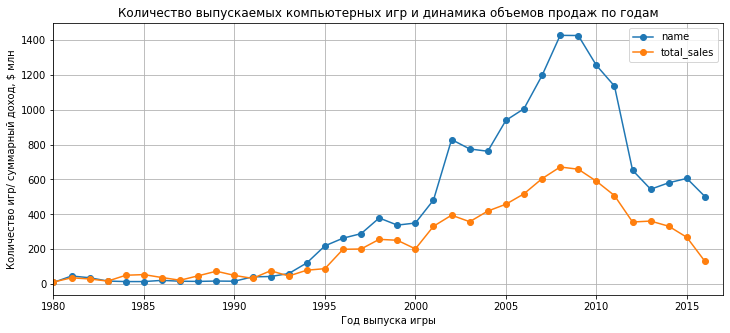

In [24]:
#Посмотрим, сколько игр выпускалось в разные годы и какой суммарный доход они приносили
games_sales.groupby(['year_of_release']).agg({'name':'count', 'total_sales':'sum'}).plot(title='Количество выпускаемых компьютерных игр и динамика объемов продаж по годам',
                   grid=True, figsize=(12, 5), xlim=(1980, 2017), style='o-')
plt.ylabel('Количество игр/ суммарный доход, $ млн')
plt.xlabel('Год выпуска игры')

Мы видим, что интерес к компьютерным играм и объем продаж растет с развитием компьютерных технологий для частного потребителя начиная с 1994 года. Пик продаж приходится на период с 2008 до 2009. Интересно, что 2008 - начало глобального экономического кризиса, увеличивается безработица и закономерно растет интерес к компьютерным играм как способу снять стресс и занять время.
Данные за весь период нам интересны с точки зрения истории бизнеса компьютерных игр. Технологии очень быстро развиваются, поэтому для анализа и будущих прогнозов необходимо брать очень небольшой исторический промежуток.

#### 3.1.2. Динамика продаж игр по платформам

In [25]:
#Посмотрим, как различается сумма продаж по платформам
top_platforms = games_sales.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)
top_platforms = top_platforms.query('total_sales > 100')
top_platforms

total_sales
platform             
ps2           1255.77
x360           971.42
ps3            939.65
wii            907.51
ds             806.12
ps             730.86
gba            317.85
ps4            314.14
psp            294.05
pc             259.52
3ds            259.00
xb             257.74
gb             255.46
nes            251.05
n64            218.68
snes           200.04
gc             198.93
xone           159.32

In [26]:
#Сделаем срез данных из нашей исходной выборки по данным из внешнего словаря, куда включим только 
#игровые платформы с суммарными продажами больше 100 млн.долларов
games_top_sales = games_sales.query('platform in @top_platforms.index')
games_top_sales.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii           2006.0        sports     41.36   
1         super mario bros.      nes           1985.0      platform     29.08   
2            mario kart wii      wii           2008.0        racing     15.68   
3         wii sports resort      wii           2009.0        sports     15.61   
4  pokemon red/pokemon blue       gb           1996.0  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

In [27]:
#Сделаем срез данных по топ платформам с суммарными продажами по годам
platforms_sales=games_top_sales.pivot_table(index='year_of_release', columns='platform', 
                                        values='total_sales', aggfunc='sum')
pd.set_option('display.max_columns', 30)
display(platforms_sales)


platform           3ds      ds     gb    gba     gc    n64    nes     pc  \
year_of_release                                                            
1983.0             NaN     NaN    NaN    NaN    NaN    NaN  10.96    NaN   
1984.0             NaN     NaN    NaN    NaN    NaN    NaN  50.08    NaN   
1985.0             NaN    0.02    NaN    NaN    NaN    NaN  53.44   0.04   
1986.0             NaN     NaN    NaN    NaN    NaN    NaN  36.41    NaN   
1987.0             NaN     NaN    NaN    NaN    NaN    NaN  19.76    NaN   
1988.0             NaN     NaN   1.43    NaN    NaN    NaN  45.01   0.03   
1989.0             NaN     NaN  64.97    NaN    NaN    NaN   7.85    NaN   
1990.0             NaN     NaN   4.89    NaN    NaN    NaN  15.73    NaN   
1991.0             NaN     NaN   5.57    NaN    NaN    NaN   6.11    NaN   
1992.0             NaN     NaN  25.49    NaN    NaN    NaN   1.98   3.03   
1993.0             NaN     NaN    NaN    NaN    NaN    NaN   3.61    NaN   
1994.0             NaN     NaN  12.18    NaN    NaN    NaN   0.11  12.87   
1995.0             NaN     NaN   3.60    NaN    NaN    NaN    NaN   4.22   
1996.0             NaN     NaN  36.03    NaN    NaN  34.10    NaN  10.58   
1997.0             NaN     NaN   6.37    NaN    NaN  39.50    NaN  11.27   
1998.0             NaN     NaN  26.90    NaN    NaN  49.24    NaN   3.26   
1999.0             NaN     NaN  38.00    NaN    NaN  57.87    NaN   4.74   
2000.0             NaN     NaN  19.76   0.07    NaN  33.97    NaN   4.66   
2001.0             NaN     NaN   9.24  61.53  26.34   3.25    NaN   5.47   
2002.0             NaN     NaN    NaN  74.16  51.81   0.08    NaN   8.57   
2003.0             NaN     NaN    NaN  56.67  50.61    NaN    NaN   8.84   
2004.0             NaN   17.27    NaN  77.91  28.82    NaN    NaN  10.39   
2005.0             NaN  130.14    NaN  33.86  27.62    NaN    NaN   4.37   
2006.0             NaN  119.81    NaN   5.28  11.26    NaN    NaN   2.85   
2007.0             NaN  146.94    NaN   3.40   0.27    NaN    NaN   9.28   
2008.0             NaN  145.31    NaN    NaN    NaN    NaN    NaN  12.42   
2009.0             NaN  119.54    NaN    NaN    NaN    NaN    NaN  16.91   
2010.0             NaN   85.02    NaN    NaN    NaN    NaN    NaN  24.28   
2011.0           63.20   26.18    NaN    NaN    NaN    NaN    NaN  35.03   
2012.0           51.36   11.01    NaN    NaN    NaN    NaN    NaN  23.22   
2013.0           56.57    1.54    NaN    NaN    NaN    NaN    NaN  12.38   
2014.0           43.76     NaN    NaN    NaN    NaN    NaN    NaN  13.28   
2015.0           27.78     NaN    NaN    NaN    NaN    NaN    NaN   8.52   
2016.0           15.14     NaN    NaN    NaN    NaN    NaN    NaN   5.25   

platform             ps     ps2     ps3     ps4    psp   snes     wii    x360  \
year_of_release                                                                 
1983.0              NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1984.0              NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1985.0              NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1986.0              NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1987.0              NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1988.0              NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1989.0              NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1990.0              NaN     NaN     NaN     NaN    NaN  26.15     NaN     NaN   
1991.0              NaN     NaN     NaN     NaN    NaN  16.22     NaN     NaN   
1992.0              NaN     NaN     NaN     NaN    NaN  32.98     NaN     NaN   
1993.0              NaN     NaN     NaN     NaN    NaN  40.02     NaN     NaN   
1994.0             6.03     NaN     NaN     NaN    NaN  35.08     NaN     NaN   
1995.0            35.96     NaN     NaN     NaN    NaN  32.20     NaN     NaN   
1996.0            94.70     NaN     NaN     NaN 

#### 3.1.3. Cредний срок жизни платформ и его статистики

In [28]:
#Посчитаем средний срок жизни платформ, которые мы отобрали в выборку и посмотрим на статистики
platforms_sales.fillna(0).astype(bool).sum(axis=0).describe()

count    18.000000
mean     10.277778
std       4.811818
min       4.000000
25%       7.250000
50%      10.500000
75%      12.000000
max      26.000000
dtype: float64

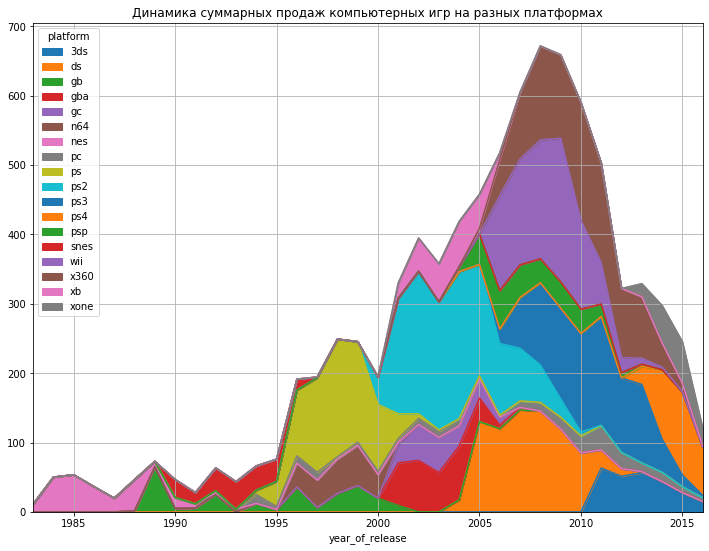

In [29]:
platforms_sales.plot.area(title='Динамика суммарных продаж компьютерных игр на разных платформах', figsize=(12, 9), grid=True)

#### Вывод: Средний характерный срок обновления платформ - 10-11 лет. Продажи по всем платформам идут по общему сценарию: с момент выхода новой платформы продажи игр на ней возрастают от года к году, затем постепенно или резко снижаются. Для выбора актуального периода исследования необходимо соблюсти два условия: нужно захватить 10 летний период исследования и платформа на момент исследования должна присутствовать на рынке сейчас и как минимимум в тот год, для которого мы готовим исследование. 

### 3.2. Анализ данных актуального периода

In [30]:
#сделаем срез данных согласно условию,описанному в последнем выводе:
games_sales = games_sales.query('year_of_release>=2007 and platform not in ("dc", "ds", "gba", "gc", "ps2", "psp", "xb")')
games_sales.head()

name platform  year_of_release     genre  na_sales  \
2              mario kart wii      wii           2008.0    racing     15.68   
3           wii sports resort      wii           2009.0    sports     15.61   
8   new super mario bros. wii      wii           2009.0  platform     14.44   
13                    wii fit      wii           2007.0    sports      8.92   
14         kinect adventures!     x360           2010.0      misc     15.00   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
2      12.76      3.79         3.29          82.0         8.3      E   
3      10.93      3.28         2.95          80.0         8.0      E   
8       6.94      4.70         2.24          87.0         8.4      E   
13      8.03      3.60         2.15          80.0         7.7      E   
14      4.89      0.24         1.69          61.0         6.3      E   

    total_sales  
2         35.52  
3         32.77  
8         28.32  
13        22.70  
14        21.82

In [31]:
#Вернемся к теме замены типа данных в столбце с годом выпуска игры. Пропусков у нас сейчас здесь нет,
#мы смело можем заменить на целочисленный тип данных 
games_sales['year_of_release'] = games_sales['year_of_release'].astype('int')
games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6093 entries, 2 to 16714
Data columns (total 12 columns):
name               6093 non-null object
platform           6093 non-null object
year_of_release    6093 non-null int64
genre              6093 non-null object
na_sales           6093 non-null float64
eu_sales           6093 non-null float64
jp_sales           6093 non-null float64
other_sales        6093 non-null float64
critic_score       3451 non-null float64
user_score         3633 non-null float64
rating             4277 non-null object
total_sales        6093 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 618.8+ KB


#### 3.2.1. Лидирующие платформы

In [32]:
#Сделаем срез по годам
top_platforms = games_sales.pivot_table(index='year_of_release', columns='platform', 
                                        values='total_sales', aggfunc='sum')
top_platforms

platform           3ds     pc     ps3     ps4    psv     wii   wiiu    x360  \
year_of_release                                                               
2007               NaN   9.28   73.19     NaN    NaN  152.77    NaN   95.41   
2008               NaN  12.42  118.52     NaN    NaN  171.32    NaN  135.26   
2009               NaN  16.91  130.93     NaN    NaN  206.97    NaN  120.29   
2010               NaN  24.28  142.17     NaN    NaN  127.95    NaN  170.03   
2011             63.20  35.03  156.78     NaN   4.63   59.65    NaN  143.84   
2012             51.36  23.22  107.36     NaN  16.19   21.71  17.56   99.74   
2013             56.57  12.38  113.25   25.99  10.59    8.59  21.65   88.58   
2014             43.76  13.28   47.76  100.00  11.90    3.75  22.03   34.74   
2015             27.78   8.52   16.82  118.90   6.25    1.14  16.35   11.96   
2016             15.14   5.25    3.60   69.25   4.25    0.18   4.60    1.52   

platform          xone  
year_of_release         
2007               NaN  
2008               NaN  
2009               NaN  
2010               NaN  
2011               NaN  
2012               NaN  
2013             18.96  
2014             54.07  
2015             60.14  
2016             26.15

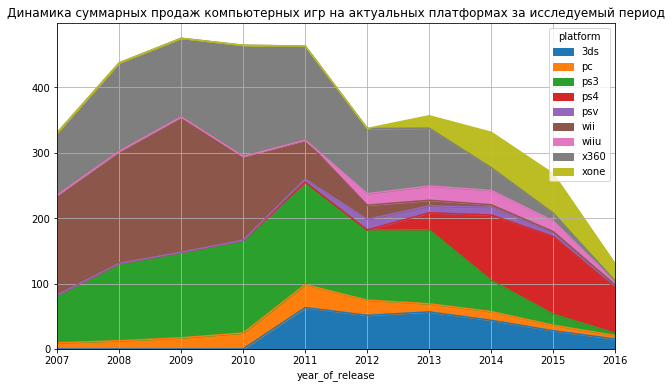

In [33]:
#Посмотрим, какие платформы лидируют по продажам
top_platforms.plot.area(
    title='Динамика суммарных продаж компьютерных игр на актуальных платформах за исследуемый период',
    figsize=(10, 6), grid=True)

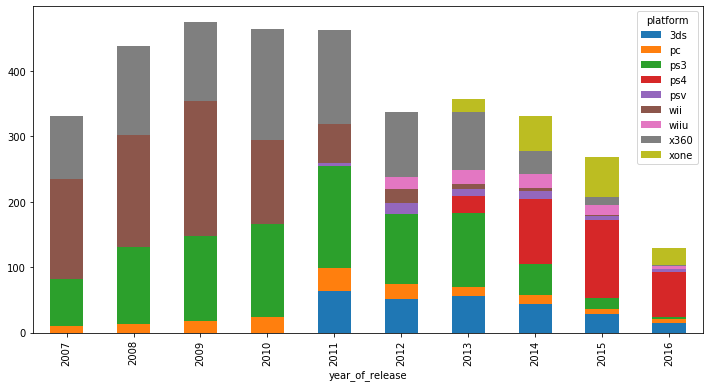

In [34]:
top_platforms.plot.bar(stacked=True, figsize=(12, 6))

Из 9 жизнеспособных на декабрь 2016 платформ  мы видим, что за последние 10 лет лидировали по продажам x360, ps3, wii. Пик продаж пройден на платформах x360, wii, ps3, wiiu, psv. Скорей всего в ближайший год-два они уйдут с рынка. На 2017 год в качестве перспективных мы видим платформы: ps4, 3ds, xone, pc. Мы оставили pc, потому что это платформа - долгожитель, первые игры на ней появились в 1985 году, она переживала взлеты и падения. Игр на этой платформе продается не так много в сравнении с другими, но продажи стабильны, платформа заняла свою нишу на рынке.

#### 3.2.2. Анализ глобальных продаж игр с разбивкой по платформам.

Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 

(-1, 40)

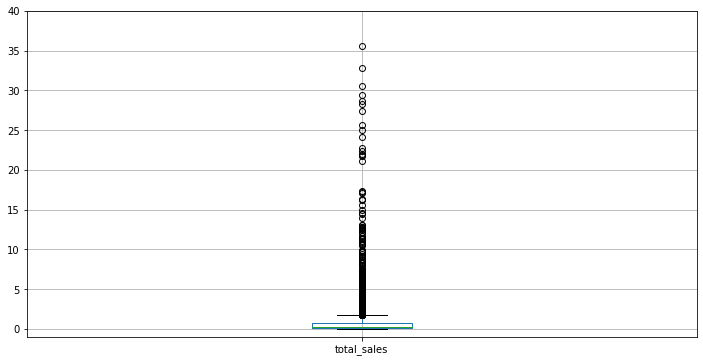

In [35]:
#Посмотрим на глобальные продажи каждой игры
games_sales.pivot_table(index='name', values='total_sales', aggfunc='sum').boxplot(figsize=(12, 6))
plt.ylim(-1, 40)

In [36]:
games_sales.pivot_table(index='name', values='total_sales', aggfunc='sum').describe()

total_sales
count  3805.000000
mean      0.944447
std       2.583737
min       0.000000
25%       0.060000
50%       0.210000
75%       0.750000
max      56.580000

Диаграмма размаха глобальных продаж игр показывет сильную скошенность данных вправо: медиана более чем в 4 раза меньше среднего значения. Глобальные продажи абсолютного большинства игр  меньше 1 млн.долларов в год, однако есть некоторое количество игр с суммарными продажами до 35 млн. игр. Важно понимать, что повлияло на такой успех этих игр, чтобы реплицировать его в будущем. 

(-1, 35)

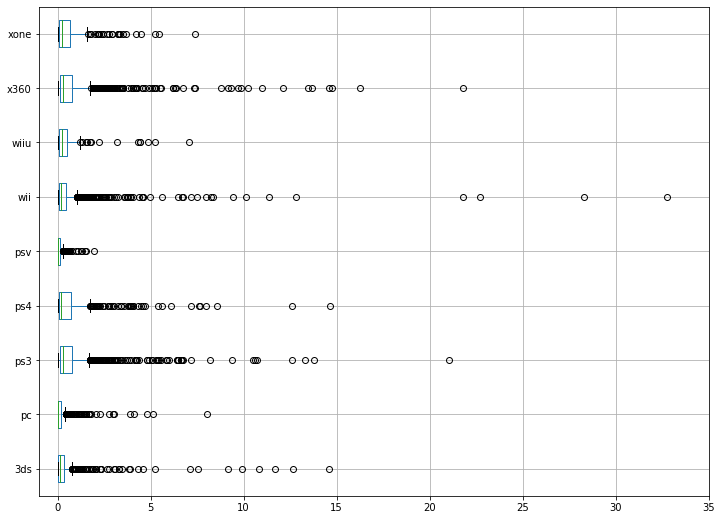

In [37]:
# Посмотрим на продажи каждой игры с разбивкой по платформам
games_sales.pivot_table(index='name', columns='platform', values='total_sales', 
                        aggfunc='sum').boxplot(vert=False, figsize=(12, 9))
plt.xlim(-1, 35)


In [38]:
games_sales.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').describe()

platform         3ds          pc          ps3         ps4         psv  \
count     512.000000  724.000000  1278.000000  392.000000  429.000000   
mean        0.503535    0.221782     0.712347    0.801378    0.125431   
std         1.441271    0.560627     1.409863    1.609456    0.212341   
min         0.010000    0.010000     0.000000    0.010000    0.010000   
25%         0.050000    0.020000     0.110000    0.060000    0.020000   
50%         0.120000    0.050000     0.275000    0.200000    0.050000   
75%         0.332500    0.180000     0.760000    0.730000    0.130000   
max        14.600000    8.010000    21.050000   14.630000    1.960000   

platform          wii        wiiu         x360        xone  
count     1242.000000  147.000000  1121.000000  247.000000  
mean         0.607110    0.559116     0.804077    0.645020  
std          2.068204    1.058836     1.687566    1.036139  
min          0.010000    0.010000     0.010000    0.010000  
25%          0.090000    0.080000     0.110000    0.060000  
50%          0.190000    0.220000     0.290000    0.220000  
75%          0.470000    0.525000     0.780000    0.685000  
max         35.520000    7.090000    21.820000    7.390000

Мы видим, что за актуальный период исследования, самыми успешными платформами были ps3, wii, x360. На этих платформах производилось самое большое количество игр. Причем средние глобальные продажи большей части игр на этих платформах составляют меньше 1 миллиона долларов, на на этих трех платформах много выбросов - высокодоходных игр, которые формируют сильный скос данных вправо. Все эти три платформы близки к своему закату, им на смену пришли новые (например на смену x360 пришел xone, на смену ps3-ps4, на смену wii - 3ds). Если мы изучим какие факторы из имеющихся у нас повлияли на успех игр на этих платформах и появления большого количества выбросов, то сможем повторить успех на наших перспективных платформах (как уже выше упоминалось, это ps4, 3ds, xone и pc) на 2017 год. pc - это платформа долгожитель, обычный компьютер. До тех пор, пока они существуют, у игр на их платформе будут свои поклонники. 

#### 3.2.4. Зависимость продаж от отзывов пользователей и критиков. Диаграмма рассеяния и корреляция между отзывами и продажами.

In [39]:
#Выберем самую успешную платформу с точки зрения продаж ps3 и ее приемницу ps4. 
#Посмотрим сначала как взаимозависимы три переменные для этих двух платформ: продажи, оценки критиков,
#оценки пользователей

fig = px.scatter(games_sales.query('platform in ("ps3", "ps4")'), x="critic_score", y="user_score", 
                 size="total_sales", color="platform",
                 hover_name="name", log_x=True, size_max=50, 
                 title='Зависимость глобальных продаж от оценок пользователей и критиков')

fig.show()

Все таки в отношении большей части игр мнения критиков и пользователей групируются где-то рядом. Но есть экземпляры игр, у которых высокий рейтинг от критиков и низкий от пользователей, но суммарные глобальные продажи большие. Это видимо, хорошая работа маркетологов, которые сумели впарить продукт, от которого пользователи потом плевались, или в продукте вылезли позже болячки, которые подпортили жизнь игрокам и они оставили негативные отзывы об игре. В общем, есть над чем думать

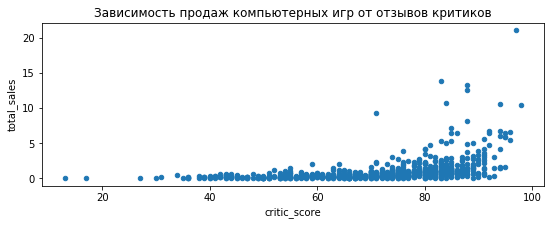

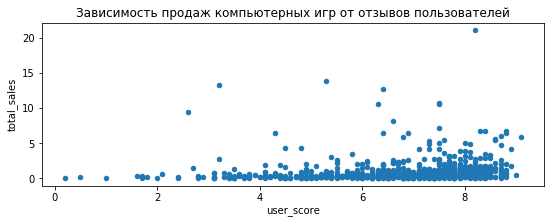

In [40]:
#Перейдем к более детальному анализу и оценим зависимость продаж от отзывов критиков и пользователей 
#для платформы ps3 и ее преемницы ps4 отдельно
games_sales.query('platform in "ps3"').plot(
    title='Зависимость продаж компьютерных игр от отзывов критиков',
    x='critic_score', y='total_sales', kind='scatter', figsize=(9, 3))
plt.show
games_sales.query('platform in "ps3"').plot(
    title='Зависимость продаж компьютерных игр от отзывов пользователей',
    x='user_score', y='total_sales', kind='scatter', figsize=(9, 3))

#### Диаграммы рассеяния показывают среднюю прямую зависимость между глобальными продажами игр на старых платформах и мнением критиков: в начале шкалы, в зоне низких оценок критиков вся наша совокупность игр находится близко к среднему и медианному уровню глобальных продаж, вытянута практически в линию. С увеличением оценки на шкале диаграмма начинает рассеиваться вверх по оси Y - то есть увеличиваются глобальные продажи относительно  медианы и все выбросы в виде супер успешных игр характерны в зоне оценки критиков больше 60 баллов.

#### При сравнении глобальных продаж и оценок пользователей мы видим картину похожую, но менее явную. Выбросы с суммарными продажами сушественно выше медианы появляются уже на границе оценки три и в целом мы видим менее явную прямую зависимость отзывов от глобальных продаж. Это можно объяснить тем, что отзывы пользователей вторичны - они сначала приобрели игру на основе отзывов критиков, потом сами попробовали и оценили на основе своего опыта.

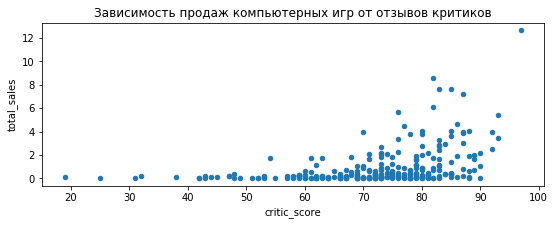

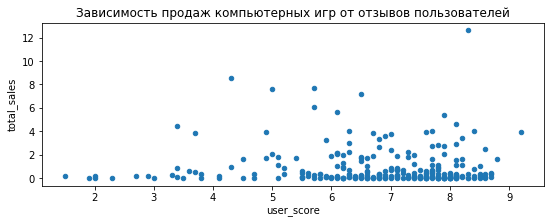

In [41]:
#Посмотрим на оценки критиков и пользователей в относительно новой платформе ps4
games_sales.query('platform in "ps4"').plot(
    title='Зависимость продаж компьютерных игр от отзывов критиков',
    x='critic_score', y='total_sales', kind='scatter', figsize=(9, 3))
plt.show
games_sales.query('platform in "ps4"').plot(
    title='Зависимость продаж компьютерных игр от отзывов пользователей',
    x='user_score', y='total_sales', kind='scatter', figsize=(9, 3))

Картинка похожая но менее интенсивная, не оформившаяся. C каждым годом жизни новой платформы, картинка будет вырисовываться все четче.

In [42]:
#Посмотрим на все остальные платформы в поисках существеных различий 
fig1 = px.scatter(games_sales.query('platform in ("x360", "xone", "pc", "wiiu", "3ds", "wii", "psv")'), 
                  x="critic_score", y="user_score", 
                 size="total_sales", color="platform",
                 hover_name="name", log_x=True, size_max=50, 
                 title='Зависимость глобальных продаж от оценок пользователей и критиков')

fig1.show()

Интересное наблюдение: в отношении игр на платформах, которые популярны в основном в Японии наблюдается подозрительное единодушие в оценках критиков и пользователей: 3ds, psv. И большие суммарные продажи группируются в квадратах с высокими пользовательскими рейтингами и отзывами критиков

 Посмотрим на коэффициенты корреляции

In [43]:
games_sales.query('platform in ("ps3")')[['total_sales', 'user_score', 'critic_score']].corr()

total_sales  user_score  critic_score
total_sales      1.000000    0.126033       0.43346
user_score       0.126033    1.000000       0.63096
critic_score     0.433460    0.630960       1.00000

In [44]:
games_sales.query('platform in ("ps4")')[['total_sales', 'user_score', 'critic_score']].corr()

total_sales  user_score  critic_score
total_sales      1.000000   -0.031957      0.406568
user_score      -0.031957    1.000000      0.557654
critic_score     0.406568    0.557654      1.000000

Коэффициенты корреляции оценивают прямую-обратную зависимости, но не зависимость как таковую.
На старых платформах прослеживается средняя прямая зависимость продаж от оценок критиков и слабая прямая зависимость от оценок пользователей.
На новых платформах прослеживается менее явная прямая зависимость продаж от оценок критиков и практически отсутствует корреляция продаж с оценками пользователей. Как мы уже проанализировали, это следствие того, что оценки пользователей вторичны, они возникают уже после покупки игры.
Нужно принимать во внимание, что на новых платформах количество выпускаемых игр в разы меньше, чем на старых. С увеличением количества статистических данных, картинка от года к году будет меняться. 

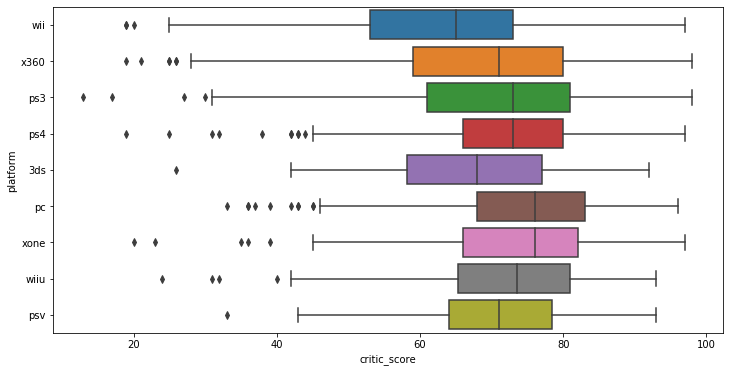

In [45]:
#Сравним оценки критиков для всех наших платформ
plt.figure(figsize=(12, 6))
sns.boxplot(y="platform", x="critic_score", data=games_sales, orient="h")

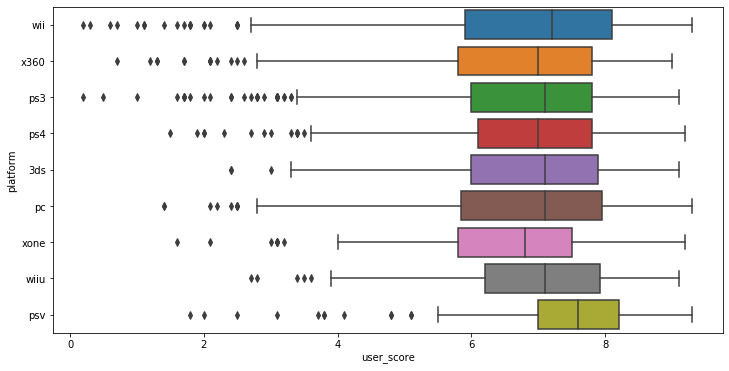

In [46]:
#оценим оценки игр пользователями для всех наших платформ
plt.figure(figsize=(12, 6))
sns.boxplot(y="platform", x="user_score", data=games_sales, orient="h")

Мы видим, что в среднем пользователи оценивают игры на всех платформах более высоко и они более единодушны в своем мнении, чем критики. 

In [47]:
games_sales.groupby('platform')['total_sales', 'user_score', 'critic_score'].corr()

total_sales  user_score  critic_score
platform                                                    
3ds      total_sales      1.000000    0.222078      0.348740
         user_score       0.222078    1.000000      0.745222
         critic_score     0.348740    0.745222      1.000000
pc       total_sales      1.000000   -0.009642      0.299516
         user_score      -0.009642    1.000000      0.518416
         critic_score     0.299516    0.518416      1.000000
ps3      total_sales      1.000000    0.126033      0.433460
         user_score       0.126033    1.000000      0.630960
         critic_score     0.433460    0.630960      1.000000
ps4      total_sales      1.000000   -0.031957      0.406568
         user_score      -0.031957    1.000000      0.557654
         critic_score     0.406568    0.557654      1.000000
psv      total_sales      1.000000    0.013489      0.131763
         user_score       0.013489    1.000000      0.734300
         critic_score     0.131763    0.734300      1.000000
wii      total_sales      1.000000    0.141303      0.237735
         user_score       0.141303    1.000000      0.685395
         critic_score     0.237735    0.685395      1.000000
wiiu     total_sales      1.000000    0.400219      0.348380
         user_score       0.400219    1.000000      0.770080
         critic_score     0.348380    0.770080      1.000000
x360     total_sales      1.000000    0.114627      0.396910
         user_score       0.114627    1.000000      0.621495
         critic_score     0.396910    0.621495      1.000000
xone     total_sales      1.000000   -0.068925      0.416998
         user_score      -0.068925    1.000000      0.472462
         critic_score     0.416998    0.472462      1.000000

#### Выводы:

#### - отзывы критиков первичны, выходят почти сразу после выпуска  игры, и пользователи на основе отзывов совершают решение о покупке 
#### - отзывы пользователей появляются после собственного тестирования и могут отличаться от отзывов критиков, но в большинстве случаев тренд сохраняется.
#### При планировании будущих продаж в исследованиях нужно обязательно принимать во внимание и рейтинг критиков и рейтинг пользователей для исключения предвзятости . Полагаем, что для старых платформ более весомы рейтинги пользователей: больше выборка и  период исследования, а для новых логично руководствоваться рейтингами критиков.

#### 3.2.5. Распределение игр по жанрам

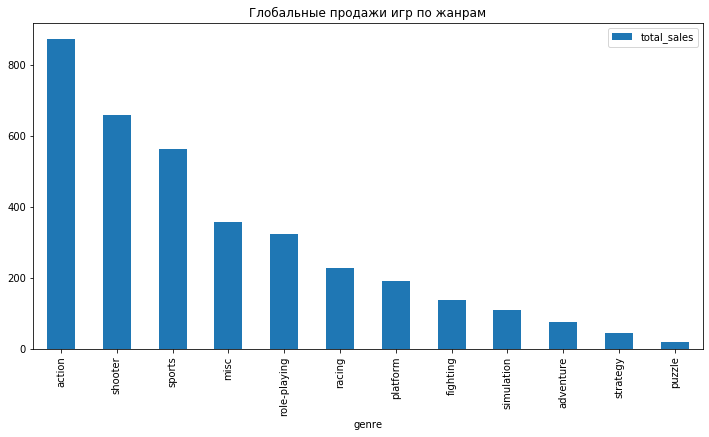

In [48]:
#Визуализируем распредленеие глобальных игр по жанрам
top_genres = games_sales.groupby('genre').agg({'total_sales':'sum'}).sort_values(
    by='total_sales', ascending=False).plot.bar(title="Глобальные продажи игр по жанрам", figsize=(12, 6))

Мы видим, что в лидерах продаж динамичные игры, требующие быстроты реакции и/или действий, направленных на других персонажей (стрелялки, гонки, боевики). Интеллектуальные спокойные игры, требующие усидчивости, сосредоточенности, напряжения ума менее популярны на рынке. Глобальные продажи таких игр как пазлы, стратегии, приключения, составляют менее 200 млн долларов в сумме. В то время как продажи одних игр в жанре action составляет 800 млн долларов.

In [49]:
#Визуализируем продажи игр по платформам и жанрам через heatmap
platform_genre_sales = games_sales.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='total_sales', 
                        aggfunc=sum).fillna(0).applymap(float)

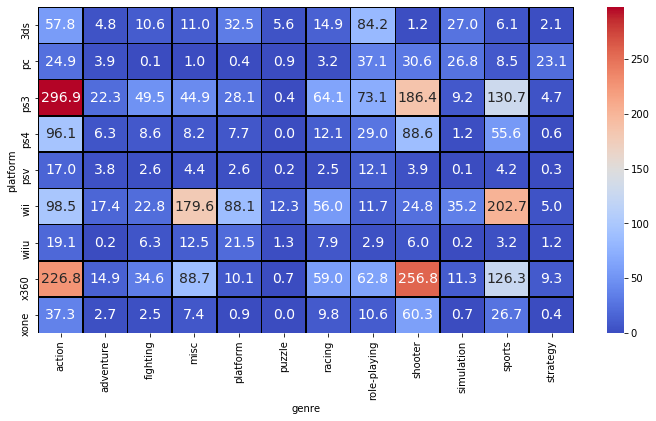

In [50]:
plt.figure(figsize=(12, 6))
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5, linecolor='black',
            cmap= 'coolwarm', annot_kws={"size": 14})


Если будем рассматривать как распределяются жанры по платформам, то видим, что наиболее популярные платформы для максимально прибыльных жанров, это - ps3 и x360, wii. 

## 4. Портрет пользователя каждого региона

#### 4.1. Топ-5 популярных платформ в каждом регионе

In [51]:
# Напишем функцию для отображения продаж по платформам в круговой диаграмме
def pie(value_1, value_2, title = ""):
    fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"), dpi= 70)
    data = value_1
    categories = value_2
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d} )".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140)
                                
    ax.legend(wedges, categories, title="Платформы", 
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=12, weight=700)
    ax.set_title(title)
    plt.show()


#### Глобальные продажи по платформам

In [52]:
#Подготовим данные
platforms_sales=games_sales.groupby('platform').agg(
    {'total_sales':'sum'}).reset_index().sort_values(by='total_sales', ascending=False)
platforms_sales

platform  total_sales
2      ps3       910.38
7     x360       901.37
5      wii       754.03
3      ps4       314.14
0      3ds       257.81
1       pc       160.57
8     xone       159.32
6     wiiu        82.19
4      psv        53.81

In [53]:
top_platforms_sales=platforms_sales.head()

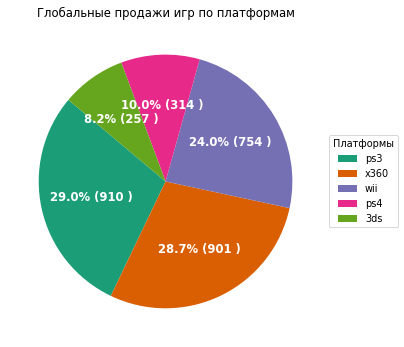

In [54]:
pie(top_platforms_sales['total_sales'], top_platforms_sales['platform'], title = "Глобальные продажи игр по платформам")

#### Северная Америка

In [55]:
#Подготовим данные
top_platforms_na_sales=games_sales.groupby('platform').agg(
    {'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head()
top_platforms_na_sales

platform  na_sales
7     x360    553.68
5      wii    416.01
2      ps3    381.29
3      ps4    108.74
8     xone     93.12

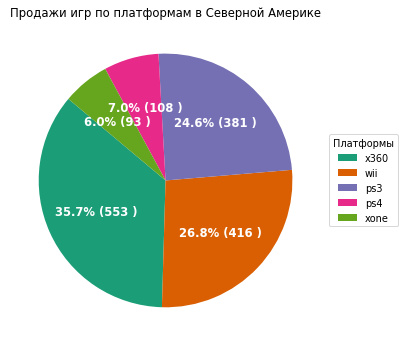

In [56]:
pie(top_platforms_na_sales['na_sales'], top_platforms_na_sales['platform'], 
    title = "Продажи игр по платформам в Северной Америке")

#### Европа

In [57]:
#Подготовим данные
top_platforms_eu_sales=games_sales.groupby('platform').agg(
    {'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head()
top_platforms_eu_sales

platform  eu_sales
2      ps3    319.83
7     x360    257.05
5      wii    214.70
3      ps4    141.09
1       pc     98.38

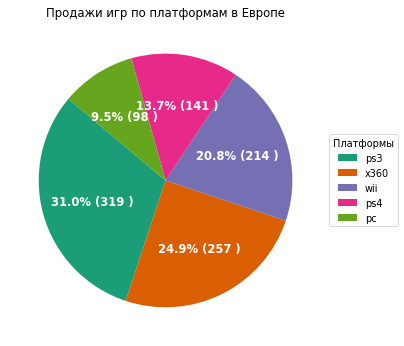

In [58]:
pie(top_platforms_eu_sales['eu_sales'], top_platforms_eu_sales['platform'], 
    title = "Продажи игр по платформам в Европе")

#### Япония

In [59]:
#Подготовим данные
top_platforms_jp_sales=games_sales.groupby('platform').agg(
    {'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head()
top_platforms_jp_sales

platform  jp_sales
0      3ds    100.62
2      ps3     78.33
5      wii     59.13
4      psv     21.84
3      ps4     15.96

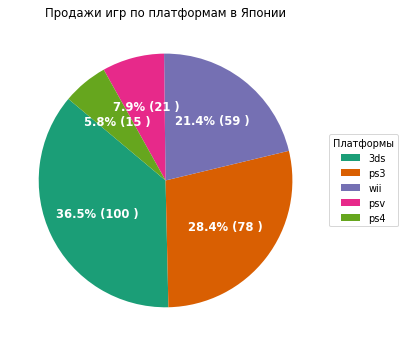

In [60]:
pie(top_platforms_jp_sales['jp_sales'], top_platforms_jp_sales['platform'], 
    title = "Продажи игр по платформам в Японии")

#### Другие регионы

In [61]:
#Подготовим данные
top_platforms_other_sales=games_sales.groupby('platform').agg(
    {'other_sales':'sum'}).reset_index().sort_values(by='other_sales', ascending=False).head()
top_platforms_other_sales

platform  other_sales
2      ps3       130.93
7     x360        79.82
5      wii        64.19
3      ps4        48.35
1       pc        18.35

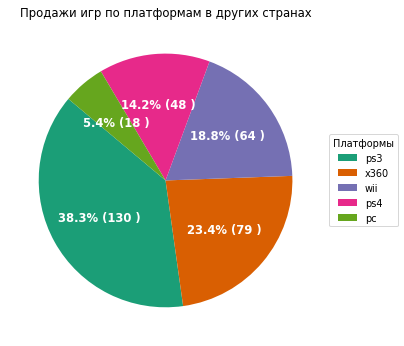

In [62]:
pie(top_platforms_other_sales['other_sales'], top_platforms_other_sales['platform'], 
    title = "Продажи игр по платформам в других странах")

Выводы: Топ-5 платформ во всем мире: ps3, x360, wii, ps4, 3ds. Интересно, первые 4 платформы в топе во всем мире кроме Японии. Пятое место в Северной Америке занимает платформа xone, в остальных странах кроме Японии - pc. Платформа 3ds - на первом месте в Японии, в топ 5 этой страны также платформа psv, которая по минимум встречается в остальных странах.  В Японии мало популярна платформа x360 (ее вообще нет в топе) и японцы не играют в игры на ПК - они на них работают.

#### 4.2. Топ-5 популярных жанров в каждом регионе

#### Глобальные продажи по жанрам

In [63]:
top_genres_total_sales=games_sales.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)
top_genres_total_sales

total_sales
genre                    
action             874.46
shooter            658.60
sports             564.10
misc               357.74
role-playing       323.47
racing             229.48
platform           192.10
fighting           137.51
simulation         111.65
adventure           76.33
strategy            46.82
puzzle              21.36

#### Северная Америка

In [64]:
top_5_na_genres = games_sales.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending = False).head(5)
top_5_na_genres

na_sales
genre                 
action          406.28
shooter         338.84
sports          285.46
misc            200.42
role-playing    130.83

#### Европа

In [65]:
top_5_eu_genres = games_sales.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending = False).head(5)
top_5_eu_genres

eu_sales
genre            
action     296.28
shooter    225.86
sports     191.22
misc       101.23
racing      94.33

#### Япония

In [66]:
top_5_jp_genres = games_sales.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending = False).head(5)
top_5_jp_genres

jp_sales
genre                 
role-playing     78.49
action           71.77
sports           27.16
misc             23.07
platform         22.54

#### Другие регионы

In [67]:
top_5_other_genres = games_sales.groupby('genre').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending = False).head(5)
top_5_other_genres

other_sales
genre                    
action             100.13
shooter             77.04
sports              60.26
misc                33.02
role-playing        28.72

Выводы: Топ-5 жанров в глобальных продажах action, shooter, sports, misc, role-playing. Тренд задает Северная Америка, где больше всего продается игр, поддерживают Европа и другие страны. В Европе на 5 месте топа - гонки вместо ролевых игр. Япония, как всегда, отличается - ролевые игры на первом месте, плюс японцы гораздо меньше играют в стрелялки и любят играть в бродилки. 

#### 4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

О рейтингах: 
T- Реалистичное насилие и грубая лексика, но в небольших количествах. Для игроков от 13 лет.
E- рассчитано на игроков от 6 лет и старше.
M - Игры с элементами насилия, кровью, черным юмором и крепкими выражениями. Возрастной ценз — 17 и более лет.
EC-Игра разрешена детям от 3 лет и старше.
E10+ - Для детей от 10 лет и старше. Такие игры могут содержать элементы Cartoon Violence (мультяшной жестокости).
RP - Данная иконка подтверждает, что игра уже принята на рассмотрение в ESRB, но итоговый рейтинг получить еще не успела.

In [68]:
# Количество игр с разными рейтингами ESRB

games_sales['rating'].value_counts()

T       1269
E       1244
M        965
E10+     794
EC         4
RP         1
Name: rating, dtype: int64

In [69]:
esrb_sales = games_sales.groupby('rating').agg(
    {'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 
     'other_sales':'sum'})
esrb_sales

na_sales  eu_sales  jp_sales  other_sales
rating                                           
E         472.39    310.72     71.30        94.06
E10+      224.88    130.06     12.65        41.66
EC          0.71      0.00      0.00         0.04
M         535.48    380.07     38.99       129.25
RP          0.00      0.03      0.00         0.01
T         317.80    197.05     51.74        70.03

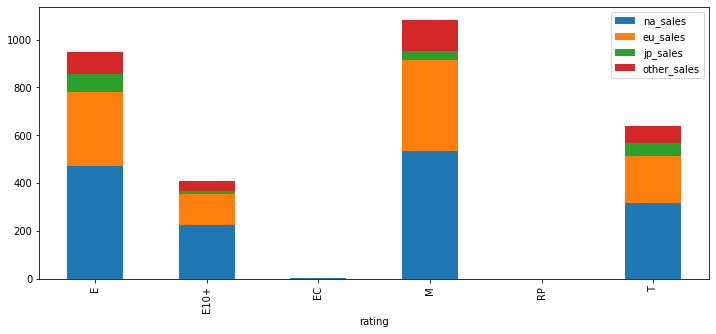

In [70]:
esrb_sales.plot.bar(stacked=True, figsize=(12, 5))

Лидеры продаж - игры, рассчитанные на взрослую аудиторию с элементами жестокости и насилия. На втором месте - игры категории E - от 6 лет и старше. На третьем - игры для тинейджеров. Самые активные пользователи всех компьютерных игр и этих продуктов в частности -  Северная Америка и Европа. 

## 5. Проверим гипотезы

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза всегда формулируется так, чтобы был использован знак равенства. Наша нулевая гипотеза о равенстве средних двух генеральных совокупностей: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются не важно как относительно друг друга. Проверим гипотезу, применив метод scipy.stats.ttest_ind (array1, array2, equal_var). При этом, мы не считаем дисперсии наших выборок равными (стандартные отклонения отличаются почти в 2 раза согласно приведенным выше в работе описательным статистикам, а дисперсия есть квадрат отклонения) и задаем параметр equal_var=False
Критический уровень статистической значимости зададим .5

In [71]:
#Сделаем срез искомых данных по платформе xone, исключив из среза пропуски в рейтингах пользователей
user_score_xone = games_sales.query('platform in "xone" and user_score.notnull()')['user_score']
user_score_xone.head()

165    7.9
179    5.4
242    6.4
270    6.2
373    4.1
Name: user_score, dtype: float64

In [72]:
user_score_pc = games_sales.query('platform in "pc" and user_score.notnull()')['user_score']
user_score_pc.head()

85     7.6
192    4.0
218    8.2
288    7.9
313    8.1
Name: user_score, dtype: float64

In [73]:
#Проверим гипотезу о равенстве пользовательских рейтингов. 
alpha = .05
results = st.ttest_ind(
    user_score_xone, 
    user_score_pc, equal_var=False)

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.04401892858926169
Отвергаем нулевую гипотезу


Вывод: Мы отвергаем нулевую гипотезу и соответственно нашу гипотезу 1 о равенстве пользовательских рейтингов платформ xone и pc. Принимаем за истину альтернативную гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Действительно, в наших предыдущих исследованиях мы приводили данные о пользовательских рейтингах по каждой платформе и рейтинг платформы pc - выше, чем платформы xone

### Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») не различаются. Альтернативная двухсторонняя гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные, не важно как друг относительно друга. 

In [74]:
#Сделаем срез искомых данных по рейтингу action, исключив из среза пропуски в рейтингах пользователей
user_score_action = games_sales.query('genre in "action" and user_score.notnull()')['user_score']
user_score_action.head()

16    8.2
23    8.1
42    8.3
51    7.9
57    7.5
Name: user_score, dtype: float64

In [75]:
user_score_sports = games_sales.query('genre in "sports" and user_score.notnull()')['user_score']
user_score_action.head()

16    8.2
23    8.1
42    8.3
51    7.9
57    7.5
Name: user_score, dtype: float64

In [76]:
#Проверим гипотезу о разности пользовательских рейтингов выбранных жанров
alpha = .05
results = st.ttest_ind(
    user_score_action, 
    user_score_sports, equal_var=False)

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.638716068800017e-14
Отвергаем нулевую гипотезу


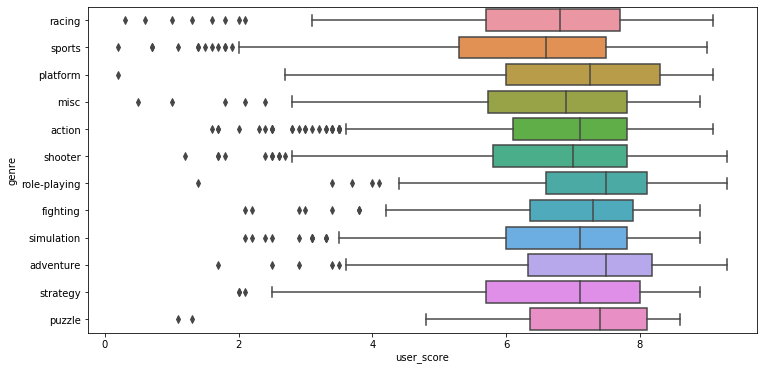

In [77]:
# Посмотрим, насколько разные рейтинги: 
plt.figure(figsize=(12, 6))
sns.boxplot(y="genre", x="user_score", data=games_sales, orient="h")

Вывод: мы отвергаем нулевую гипотезу о равенстве пользовательских рейтингов жанров action и sports и не отвергаем нашу альтернативную гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

## Выводы:

#### 1. Проведен анализ данных из открытых источников по продажам компьютерных игр за период с 1980 по 2016 год. В исходной выборке 16715 строчек, присутствуют пропуски в данных года выпуска, жанра, оценок критиков, пользователей и рейтинга. Удалили только 2 строки с пропусками, где отсутствовал жанр. Это две старые игры с суммарными продажами стремящимися к нулю. Остальные пропуски оставили с расчетом на то, что часть из них удалится автоматически при формировании выборки для исследования, а пропуски, которые будут мешать в расчетах, мы изолируем путем формирования среза "чистых" данных. Также мы привели все данные к нижнему регистру, изменили тип данных в столбце года выпуска на int, тип данных object в столбце пользовательского рейтинга на float. В столбце user_score есть строки с данными "tbd", это общепринятое сокращение, когда данных нет, но они ожидаются в ближайшее время. Мы изменили эти данные на NaN.  Добавили в таблицу с данными столбец глобальных продаж total_sales.
#### 2. Дальнейшие исследования мы проводили на базе языка программирования Python с использованием встроенных библиотек pandas, numpy, matplotlib.pyplot, scipy, seaborn.
#### 3. Интерес к компьютерным играм и объем продаж растет с развитием компьютерных технологий для частного потребителя начиная с 1994 года. Пик продаж приходится на период с 2008 до 2009.
#### 4. Из исходной выборки мы выделили выборку для исследования на основе двух условий: 
- платформа на момент исследования должна присутствовать на рынке сейчас и как минимум в тот год, для которого мы готовим исследование. 
- Нужно захватить временной период средней продолжительности жизни платформы. 
#### В итоге наша актуальная выборка включает последние 10 лет исследования и состоит из платформ: 3ds, pc, ps3, ps4, psv,  wii,  wiiu,  x360, xone. 
За актуальный период исследования, самыми успешными платформами были ps3, wii, x360. На этих платформах производилось самое большое количество игр. Cредние глобальные продажи большей части игр на этих платформах составляют меньше 1 миллиона долларов, медианные продажи - менее 0.5 млн долларов, как на других платформах нашей выборки. Но на этих трех платформах выпускалось много высокодоходных игр, которые формируют сильный скос данных вправо.
#### 5. На 2017 год в качестве перспективных мы видим платформы: ps4, 3ds, xone, pc.  Первые три из них являются последовательницами устаревших топ платформ ps3, wii и x360 соответственно. PC- это платформа долгожитель, обычный компьютер. До тех пор, пока они существуют, у игр на их платформе будут свои поклонники.
#### 6. При планировании будущих продаж в исследованиях нужно обязательно принимать во внимание рейтинг критиков и рейтинг пользователей для исключения предвзятости . Полагаем, что для старых платформ более весомы рейтинги пользователей: больше выборка и период исследования, а для новых логично руководствоваться рейтингами критиков. Отзывы критиков первичны, выходят сразу после выпуска игры, и пользователи на основе этих отзывов совершают решение о покупке. Отзывы пользователей появляются после самостоятельного тестирования и формируют независимое мнение, которое может отличаться от мнения критиков.
#### 7. В нашем исследовании диаграммы рассеяния показывают среднюю прямую зависимость между глобальными продажами игр и мнением критиков: в начале шкалы, в зоне низких оценок критиков вся наша совокупность игр находится близко к среднему и медианному уровню глобальных продаж, вытянута практически в линию. С увеличением оценки на шкале выборка начинает расширяться вверх по оси Y - то есть увеличиваются глобальные продажи относительно медианы и все выбросы в виде супер успешных игр характерны в зоне оценки критиков больше 60 баллов.Зависимость между глобальными продажами игр и мнением пользователей отличается.  Выбросы с суммарными продажами существенно выше медианы появляются уже на границе оценки три и в целом мы видим менее явную зависимость.
#### 8. Мы видим, что в лидерах продаж динамичные игры, требующие быстроты реакции и/или действий, направленных на других персонажей (стрелялки, гонки, боевики). Интеллектуальные спокойные игры, требующие усидчивости, сосредоточенности, напряжения ума менее популярны на рынке. Глобальные продажи таких игр как пазлы, стратегии, приключения, составляют менее 200 млн долларов в сумме. В то время как продажи одних игр в жанре action составляет 800 млн долларов. 
#### 9. Наиболее популярные платформы для максимально прибыльных жанров, это - ps3 и x360, wii. 
#### 10. Лидеры продаж - игры, рассчитанные на взрослую аудиторию с элементами жестокости и насилия - категория M. На втором месте - игры категории E - от 6 лет и старше. На третьем - игры для тинейджеров - категория T. Самые активные пользователи всех компьютерных игр и этих продуктов в частности - Северная Америка и Европа. Для Японии в порядке убывания последовательность такая: E, T, M
#### 11. Средние пользовательские рейтинги платформ Xbox One и PC различаются: рейтинг платформы pc - выше, чем платформы xone
#### 12.  Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные: Средний пользовательский рейтинг жанра action - выше, чем жанра sports 

### Рекомендации маркетологам :
### 1. Для рынка Северной Америки: увеличить ассортимент игр на платформах ps4 и xone в жанрах action, shooter, sports, misc, role-playing. 

### 2. Для рынка Европы: увеличить ассортимент игр на платформах ps4 и поддерживать ассортимент игр для pc в жанре action, shooter, sports, misc, racing

### 3. Для рынка Японии: увеличить ассортимент игр на платформах 3ds и ps4 в жанрах role-playing, action, sports, misc, platform
